<font size="+3"><strong>House Price Prediction For Houses In Mexico City<font size="+3"></strong>

In [40]:
import warnings
from glob import glob #for using glob which is used while working with different csv files but i did not make use of it here

import pandas as pd #for data manipulation
import seaborn as sns #for data visualization
import matplotlib.pyplot as plt #used for visualization
import plotly.express as px
from category_encoders import OneHotEncoder
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact
from sklearn.impute import SimpleImputer 
from sklearn.linear_model import LinearRegression, Ridge  # noqa F401 #for building a model
from sklearn.metrics import mean_absolute_error #for evaluating a model
from sklearn.pipeline import make_pipeline
from sklearn.utils.validation import check_is_fitted #a way to make sure a model is fitted

ModuleNotFoundError: No module named 'category_encoders'

**Defining a wrangle function that i will use in wrangling and cleaning my data set**
Here i need to put in codes that'll help me clean my dataset

In [2]:
# #defining a function
def wrangle(input):
    #mexico uses borough so i changed it from state to borough
    frames["borough"] = frames["state"]

    #drop some columns that are not needed
    frames.drop(columns = ["place_with_parent_names","lat-lon", "state", "price_mxn","Unnamed: 0"], inplace= True)
    # mask_price = frames["price_aprox_usd"] < 250_000
    # frames = frames[mask_city & mask_apt & mask_price] 
    
   #   # Subset data: Remove outliers for "surface_covered_in_m2"
   #  low, high = frames["surface_covered_in_m2"].quantile([0.1, 0.9])
   #  mask_area = frames["surface_covered_in_m2"].between(low, high)
   #  frames = frames[mask_area] 

    
    
    
    
   
#     return df

In [3]:
df1 = pd.read_csv("mexico-real-estate-1.csv",encoding=' ISO-8859-1')
df2 = pd.read_csv("mexico-real-estate-2.csv",encoding=' ISO-8859-1')
df3 = pd.read_csv("mexico-real-estate-3.csv",encoding=' ISO-8859-1')


In [4]:
df1.shape
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     700 non-null    int64  
 1   property_type  700 non-null    object 
 2   state          700 non-null    object 
 3   lat            583 non-null    float64
 4   lon            583 non-null    float64
 5   area_m2        700 non-null    int64  
 6   price_usd      700 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 38.4+ KB


,Unnamed: 0,property_type,state,lat,lon,area_m2,price_usd
0,1,house,Estado de México,19.560181,-99.233528,150,"$67,965.56"
1,2,house,Nuevo León,25.688436,-100.198807,186,"$63,223.78"
2,3,apartment,Guerrero,16.767704,-99.764383,82,"$84,298.37"
3,4,apartment,Guerrero,16.829782,-99.911012,150,"$94,308.80"
4,5,house,Veracruz de Ignacio de la Llave,NaN,NaN,175,"$94,835.67"


In [5]:
df1["price_usd"] = df1["price_usd"].str.replace("$" , "" , regex = True).str.replace(",", "").astype(float)

In [6]:
df1["price_usd"]

0       67965.56
1       63223.78
2       84298.37
3       94308.80
4       94835.67
         ...    
695    237089.17
696    137017.34
697    110404.35
698    184446.42
699     56637.97
Name: price_usd, Length: 700, dtype: float64

In [7]:
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     700 non-null    int64  
 1   property_type  700 non-null    object 
 2   state          700 non-null    object 
 3   lat            571 non-null    float64
 4   lon            571 non-null    float64
 5   area_m2        700 non-null    int64  
 6   price_mxn      700 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 38.4+ KB


,Unnamed: 0,property_type,state,lat,lon,area_m2,price_mxn
0,1,apartment,Nuevo León,25.721081,-100.345581,72,1300000
1,2,apartment,Puebla,NaN,NaN,190,2500000
2,3,house,Morelos,23.634501,-102.552788,360,5300000
3,4,house,Morelos,NaN,NaN,76,820000
4,5,house,Puebla,NaN,NaN,200,1100000


In [8]:
df2.head()

,Unnamed: 0,property_type,state,lat,lon,area_m2,price_mxn
0,1,apartment,Nuevo León,25.721081,-100.345581,72,1300000
1,2,apartment,Puebla,NaN,NaN,190,2500000
2,3,house,Morelos,23.634501,-102.552788,360,5300000
3,4,house,Morelos,NaN,NaN,76,820000
4,5,house,Puebla,NaN,NaN,200,1100000


In [9]:
#Changing pesos to usd
df2["price_usd"] = (df2["price_mxn"] / 19).round(2)


df2.head()

,Unnamed: 0,property_type,state,lat,lon,area_m2,price_mxn,price_usd
0,1,apartment,Nuevo León,25.721081,-100.345581,72,1300000,68421.05
1,2,apartment,Puebla,NaN,NaN,190,2500000,131578.95
2,3,house,Morelos,23.634501,-102.552788,360,5300000,278947.37
3,4,house,Morelos,NaN,NaN,76,820000,43157.89
4,5,house,Puebla,NaN,NaN,200,1100000,57894.74


In [10]:
df2["state"].unique()

array(['Nuevo León', 'Puebla', 'Morelos', 'San Luis Potosí',
       'Estado de México', 'Distrito Federal',
       'Veracruz de Ignacio de la Llave', 'Yucatán', 'Chihuahua',
       'Jalisco', 'Guerrero', 'Chiapas', 'Baja California', 'Querétaro',
       'Hidalgo', 'Aguascalientes', 'Quintana Roo', 'Guanajuato',
       'Tabasco', 'Tamaulipas', 'Nayarit', 'Sinaloa', 'Colima', 'Sonora',
       'Durango', 'Baja California Sur', 'Tlaxcala'], dtype=object)

In [11]:
df3.shape
df3.info()
df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               700 non-null    int64  
 1   property_type            700 non-null    object 
 2   place_with_parent_names  700 non-null    object 
 3   lat-lon                  582 non-null    object 
 4   area_m2                  700 non-null    int64  
 5   price_usd                700 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 32.9+ KB


,Unnamed: 0,property_type,place_with_parent_names,lat-lon,area_m2,price_usd
0,1,apartment,|México|Distrito Federal|Gustavo A. Madero|Acu...,"19.52589,-99.151703",71,48550.59
1,2,house,|México|Estado de México|Toluca|Metepec|,"19.2640539,-99.5727534",233,168636.73
2,3,house,|México|Estado de México|Toluca|Toluca de Lerd...,"19.268629,-99.671722",300,86932.69
3,4,house,|México|Morelos|Temixco|Burgos Bugambilias|,NaN,275,263432.41
4,5,apartment,|México|Veracruz de Ignacio de la Llave|Veracruz|,"19.511938,-96.871956",84,68508.67


In [12]:
# creating a new column space from "place_with_parent_names"
df3["state"] = df3["place_with_parent_names"].str.split("|", expand = True)[2]


In [13]:
df3.head()


,Unnamed: 0,property_type,place_with_parent_names,lat-lon,area_m2,price_usd,state
0,1,apartment,|México|Distrito Federal|Gustavo A. Madero|Acu...,"19.52589,-99.151703",71,48550.59,Distrito Federal
1,2,house,|México|Estado de México|Toluca|Metepec|,"19.2640539,-99.5727534",233,168636.73,Estado de México
2,3,house,|México|Estado de México|Toluca|Toluca de Lerd...,"19.268629,-99.671722",300,86932.69,Estado de México
3,4,house,|México|Morelos|Temixco|Burgos Bugambilias|,NaN,275,263432.41,Morelos
4,5,apartment,|México|Veracruz de Ignacio de la Llave|Veracruz|,"19.511938,-96.871956",84,68508.67,Veracruz de Ignacio de la Llave


In [14]:
files = df1, df2, df3


In [15]:
frames = pd.concat(files, ignore_index = True)

In [16]:
wrangle(frames)

In [17]:
frames.info()
frames.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     2100 non-null   int64  
 1   property_type  2100 non-null   object 
 2   lat            1154 non-null   float64
 3   lon            1154 non-null   float64
 4   area_m2        2100 non-null   int64  
 5   price_usd      2100 non-null   float64
 6   borough        2100 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 115.0+ KB


,Unnamed: 0,property_type,lat,lon,area_m2,price_usd,borough
0,1,house,19.560181,-99.233528,150,67965.56,Estado de México
1,2,house,25.688436,-100.198807,186,63223.78,Nuevo León
2,3,apartment,16.767704,-99.764383,82,84298.37,Guerrero
3,4,apartment,16.829782,-99.911012,150,94308.80,Guerrero
4,5,house,NaN,NaN,175,94835.67,Veracruz de Ignacio de la Llave


In [18]:


frames.describe()["area_m2"]
frames["property_type"].unique()

array(['house', 'apartment'], dtype=object)

In [19]:
# frames = [wrangle(file) for file in files]
# df = pd.concat(frames, ignore_index = True)
# print(df.info())
# df.head()

In [20]:
frames.select_dtypes("number").nunique()

Unnamed: 0     700
lat            972
lon            945
area_m2        283
price_usd     1016
dtype: int64

In [21]:
frames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     2100 non-null   int64  
 1   property_type  2100 non-null   object 
 2   lat            1154 non-null   float64
 3   lon            1154 non-null   float64
 4   area_m2        2100 non-null   int64  
 5   price_usd      2100 non-null   float64
 6   borough        2100 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 115.0+ KB


Text(0.5, 1.0, 'Distribution of Apartment Prices')

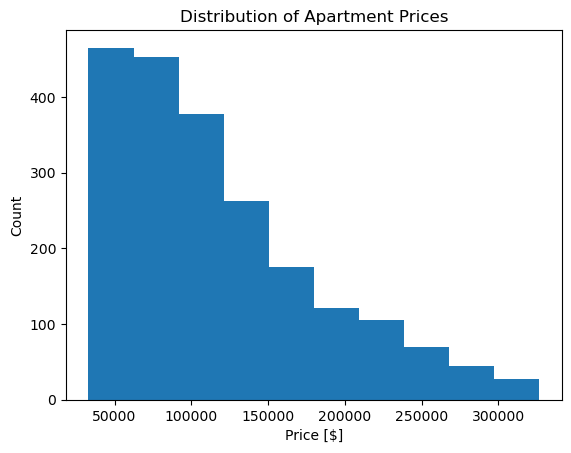

In [22]:
# Build histogram
plt.hist(frames["price_usd"])


# Label axes
plt.xlabel("Price [$]")
plt.ylabel("Count")
# Add title
plt.title("Distribution of Apartment Prices")

<Axes: xlabel='price_usd'>

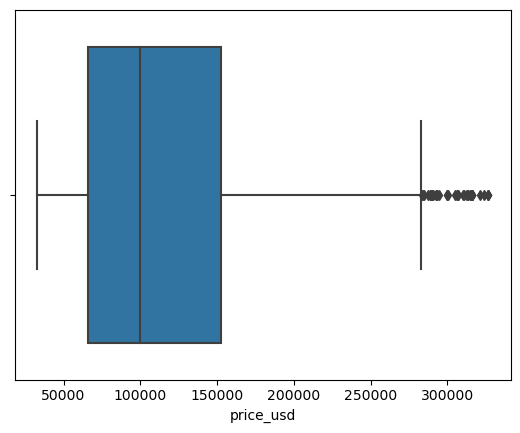

In [25]:
sns.boxplot(x=frames["price_usd"])

Text(0.5, 1.0, 'Mexico City: Price vs. Area')

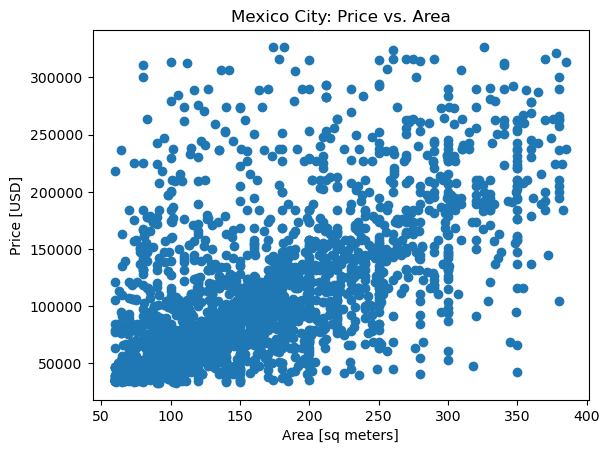

In [27]:
 # Build scatter plot
plt.scatter(frames["area_m2"], frames["price_usd"])


# Label axes
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")

# Add title
plt.title("Mexico City: Price vs. Area")

In [31]:
# Plot Mapbox location and price
fig = px.scatter_mapbox(
    frames,  # Our DataFrame
    lat= "lat",
    lon= "lon",
    width=600,  # Width of map
    height=600,  # Height of map
    color= "price_usd",
    hover_data=["price_usd"],  # Display price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

In [33]:
# Split data into feature matrix `X_train` and target vector `y_train`.
target = "price_usd"
feature = ["area_m2","lat","lon","borough"]
X_train = frames[feature]
y_train = frames[target]

In [37]:
print(frames.describe())
frames.info()

        Unnamed: 0          lat          lon      area_m2      price_usd
count  2100.000000  1154.000000  1154.000000  2100.000000    2100.000000
mean    350.500000    20.828790   -98.700313   173.022857  117191.839248
std     202.120518     2.769135     5.022179    79.736156   66556.107133
min       1.000000    16.228815  -117.038495    60.000000   32947.370000
25%     175.750000    19.273012  -100.390343   105.000000   65840.942500
50%     350.500000    19.681733   -99.193812   160.000000  100000.000000
75%     525.250000    21.129547   -98.207117   223.000000  152790.800000
max     700.000000    32.665619   -86.767539   385.000000  326733.660000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     2100 non-null   int64  
 1   property_type  2100 non-null   object 
 2   lat            1154 non-null   float64
 3   lon         

In [34]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train) #it was seeing y_mean as a single value without the square bracket so i added it to fix that
baseline_mae = mean_absolute_error(y_train, y_pred_baseline)
print("Mean apt price:", y_mean)
print("Baseline MAE:", baseline_mae)

Mean apt price: 117191.83924761905
Baseline MAE: 53432.94775336054


## The One Hot Encoder and The Simple Imputer##
 They are both preprocessors '**OneHotEncoder**' is used for encoding categorical variables as seen in our feature specifically in "borough" which contains categories. Categorical variables are variables that represent categories or labels rather than numerical values. Many machine learning algorithms require numerical input, so categorical variables need to be converted into a numerical format.

 '**Simple Imputer**' is used  for handling missing data in your dataset. Missing data is a common issue in real-world datasets, and it's essential to address it before training machine learning models. 

 There is another preprocessing module i wanted to document here although there was no use of it in the project which is the "**StandardScaler**" is a preprocessing technique used in machine learning and statistics to transform numerical data in a dataset, such as features or variables, so that they have a mean of 0 and a standard deviation of 1. This transformation is also known as standardization or z-score normalization.

I created a pipeline named `model` that contains all the transformers necessary for this dataset and one of the predictors you've used during this project. Then fit your model to the training data.

In [38]:
# Build Model
model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    Ridge()
)

# Fit model
model.fit(X_train, y_train)

NameError: name 'OneHotEncoder' is not defined